# Betting on NBA

In [1]:
#TO IMPROVE
# Find the players that scored often during the last games + compute average time playing per game
# check change of coach
# put a higher weight on the recent games
# check max serie > 10, print ?
# Run automatically the program
# stock the game history

In [1]:
#pip install selenium
#pip install webdriver-manager
#pip install BeautifulSoup4
#!pip install --upgrade pandas
import pandas as pd
import numpy as np
import re
import requests
import webbrowser
import seaborn as sns
import urllib.request, json 
import unicodedata
import requests
import math
import csv
import os
import matplotlib.pyplot as plt
import datetime

from unidecode import unidecode
from IPython.core.display import display, HTML
from itertools import chain
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
#from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from selenium import webdriver
from datetime import datetime, date, timedelta
from tqdm import tqdm


pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
#driver = webdriver.Chrome("C:/Users/Valentin/Documents/Winamax/chromedriver")
driver = webdriver.Chrome(ChromeDriverManager().install())

#Function Soup
def get_page(special_match):
    driver.get(special_match)
    try:
        element = driver.find_element_by_class_name('banner-actions-container')
        element.click()
    except:
        do = "Nothing"

def strip_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text)
                   if unicodedata.category(c) != 'Mn')

def make_clickable(val):
    if (isinstance(val, str) and val.find("http") != -1):
        return '<a href="{}">{}</a>'.format(val,val.split("id/")[1].split("/")[1])
    else:
        return val

C:\Users\Valentin\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


====== WebDriver manager ======
Current google-chrome version is 110.0.5481
Get LATEST driver version for 110.0.5481
Driver [C:\Users\Valentin\.wdm\drivers\chromedriver\win32\110.0.5481.77\chromedriver.exe] found in cache


In [241]:
%run ./Unibet.ipynb

100%|██████████| 27/27 [00:14<00:00,  1.84it/s]


[]
[]


In [233]:
# pd.DataFrame(row_data0)[pd.DataFrame(row_data0)["IdGame"]=="2650664_1"]#["Home"].iloc[0]

In [242]:
%run ./ESPN.ipynb

100%|██████████| 7/7 [00:00<00:00, 133.22it/s]


In [281]:
# dfGames.head()
# Unibet.head()

# History.head()
# AwayStats.head()
# HomeStats.head()
# Streak.head(10).style.background_gradient(cmap="viridis").set_precision(0)

In [243]:
%run ./MatchTeamNames.ipynb

AwayStats["Away"].replace(Dict_teams, inplace=True)
HomeStats["Home"].replace(Dict_teams, inplace=True)
Unibet["Away"].replace(Dict_teams, inplace=True)
Unibet["Home"].replace(Dict_teams, inplace=True)
dfGames["Away"].replace(Dict_teams, inplace=True)
dfGames["Home"].replace(Dict_teams, inplace=True)
Streak["Team"].replace(Dict_teams, inplace=True)

AwayStats["Away"].replace(Match_teams, inplace=True)
HomeStats["Home"].replace(Match_teams, inplace=True)
Unibet["Away"].replace(Match_teams, inplace=True)
Unibet["Home"].replace(Match_teams, inplace=True)
dfGames["Away"].replace(Match_teams, inplace=True)
dfGames["Home"].replace(Match_teams, inplace=True)
Streak["Team"].replace(Match_teams, inplace=True)

a = list(set(Unibet["Away"])) + list(set(Unibet["Home"]))
b = list(set(AwayStats["Away"])) + list(set(HomeStats["Home"]))
print(list(np.setdiff1d(a,b)))
print(list(np.setdiff1d(b,a)))

print(len(Unibet))
Final = Unibet.merge(HomeStats, on='Home', how='left').merge(AwayStats, on='Away', how='left').dropna(subset=['2As']).dropna(subset=['1Hs'])
Final = Final.merge(Streak.rename(columns={'Team': 'Home',
                                           'max': 'maxH_HA'
                                          })[['Home', 'W','L','D','WD','LD','WL',
                                              'HW','HL','HD','HWD','HLD','HWL','maxH_HA','maxH']].add_prefix('S1').rename(columns={'S1Home': 'Home'}), on='Home', how='left')
Final = Final.merge(Streak.rename(columns={'Team': 'Away',
                                           'max': 'maxA_HA'
                                          })[['Away', 'W','L','D','WD','LD','WL',
                                              'AW','AL','AD','AWD','ALD','AWL','maxA_HA','maxA']].add_prefix('S2').rename(columns={'S2Away': 'Away'}), on='Away', how='left')
print(len(Final))

# Final.head()
# Find the matching teams between these lists

['A. Niigata', 'Avispa Fukuoka', 'Cerezo Osaka', 'Consadole Sapporo', 'Delfin SC', 'FC Tokyo', 'Gamba Osaka', 'Kashima Antlers', 'Kashiwa Reysol', 'Kawasaki Frontale', 'Kyoto Sanga FC', 'Nagoya Grampus', 'Orense SC', 'Sagan Tosu', 'Sanfrecce Hiroshima', 'Shonan Bellmare', 'Urawa Red Diamonds', 'Vissel Kobe', 'Yokohama FC', 'Yokohama Marinos']
['Guarani', 'Nacional']
27
12


In [106]:
minProba = 0.5
minDiffProba = 1.1
results_dict = {}
# weight = [[f"{round(i * 0.05, 2)} {round(1 - i * 0.05, 2)}", round(i * 0.05, 2), round(1 - i * 0.05, 2)] for i in range(11)]
weight = [["0.5 0.5", 0.5, 0.5]]

param_names = [['H', '1Hs', '1n', '2Hs', '2n'],
               ['D', '1Ds', '1n', '2Ds', '2n'],
               ['A', '1As', '1n', '2As', '2n'],
               
               ['H/D', '1DH', '1n', '2DH', '2n'],
               ['D/A', '1DA', '1n', '2DA', '2n'],
               ['H/A', '1HA', '1n', '2HA', '2n'],
               
               #LDEM
               ['LDEM', '1LDEMs', '1n', '2LDEMs', '2n'],
               ['LDEMP', '1LDEMPs', '1n', '2LDEMPs', '2n'],
               
               ['H/D&LDEM', '1DHLDEMs', '1n', '1DHLDEMPs', '2n'],
               ['D/A&LDEM', '1DALDEMs', '1n', '2DALDEMs', '2n'], 
               ['H/A&LDEM', '1HALDEMs', '1n', '2HALDEMs', '2n'], 
               
               ['H/D&LDEMP', '1DHLDEMPs', '1n', '2DHLDEMPs', '2n'],
               ['D/A&LDEMP', '1DALDEMPs', '1n', '2DALDEMPs', '2n'],
               ['H/A&LDEMP', '1HALDEMPs', '1n', '2HALDEMPs', '2n'],
               
               #Moins de goals
               ['H/D&M4,5', '1DHB<5', '1n', '2DHB<5', '2n'],
               ['D/A&M4,5', '1DAB<5', '1n', '2DAB<5', '2n'],
               ['H/A&M4,5', '1HAB<5', '1n', '2HAB<5', '2n'],
               
               ['H/D&M3,5', '1DHB<4', '1n', '2DHB<4', '2n'],
               ['D/A&M3,5', '1DAB<4', '1n', '2DAB<4', '2n'],
               ['H/A&M3,5', '1HAB<4', '1n', '2HAB<4', '2n'],
               
               ['H/D&M2,5', '1DHB<3', '1n', '2DHB<3', '2n'],
               ['D/A&M2,5', '1DAB<3', '1n', '2DAB<3', '2n'],
               ['H/A&M2,5', '1HAB<3', '1n', '2HAB<3', '2n'],
               
               ['H/D&M1,5', '1DHB<2', '1n', '2DHB<2', '2n'],
               ['D/A&M1,5', '1DAB<2', '1n', '2DAB<2', '2n'],
               ['H/A&M1,5', '1HAB<2', '1n', '2HAB<2', '2n'],
               
               #Plus de goals
               ['H/D&P4,5', '1DHB>4', '1n', '2DHB>4', '2n'],
               ['D/A&P4,5', '1DAB>4', '1n', '2DAB>4', '2n'],
               ['H/A&P4,5', '1HAB>4', '1n', '2HAB>4', '2n'],
               
               ['H/D&P3,5', '1DHB>3', '1n', '2DHB>3', '2n'],
               ['D/A&P3,5', '1DAB>3', '1n', '2DAB>3', '2n'],
               ['H/A&P3,5', '1HAB>3', '1n', '2HAB>3', '2n'],
               
               ['H/D&P2,5', '1DHB>2', '1n', '2DHB>2', '2n'],
               ['D/A&P2,5', '1DAB>2', '1n', '2DAB>2', '2n'],
               ['H/A&P2,5', '1HAB>2', '1n', '2HAB>2', '2n'],
               
               ['H/D&P1,5', '1DHB>1', '1n', '2DHB>1', '2n'],
               ['D/A&P1,5', '1DAB>1', '1n', '2DAB>1', '2n'],
               ['H/A&P1,5', '1HAB>1', '1n', '2HAB>1', '2n'],
               
               #Buts> <
               ['M0,5', '1B<1', '1n', '2B<1', '2n'],
               ['M1,5', '1B<2', '1n', '2B<2', '2n'],
               ['M2,5', '1B<3', '1n', '2B<3', '2n'],
               ['M3,5', '1B<4', '1n', '2B<4', '2n'],
               ['M4,5', '1B<5', '1n', '2B<5', '2n'],
               ['M5,5', '1B<6', '1n', '2B<6', '2n'],
               
               ['P0,5', '1B>0', '1n', '2B>0', '2n'],
               ['P1,5', '1B>1', '1n', '2B>1', '2n'],
               ['P2,5', '1B>2', '1n', '2B>2', '2n'],
               ['P3,5', '1B>3', '1n', '2B>3', '2n'],
               ['P4,5', '1B>4', '1n', '2B>4', '2n'],
               ['P5,5', '1B>5', '1n', '2B>5', '2n'],
        
              ]
def weighted_mean(value1, value2, weight1, weight2):
    weighted_mean = (max(weight1, weight2) * max(value1, value2)) + (min(weight1, weight2) * min(value1, value2))
    return weighted_mean

for w in weight:        
    results = pd.DataFrame(columns=['IdGame', 'Date', 'Home', 'Away', 'Bet', 'Odd', 'MaProba', 'UnibetProba', 'DiffProba'])
    for params in param_names:
        for _, row in Final.iterrows():
            if ((row[params[2]] >= 5) and (row[params[4]] >= 5)): 
                if (w[1]+w[2]) == 1:
                    meanBet = weighted_mean(row[params[1]]/row[params[2]], row[params[3]]/row[params[4]], w[1], w[2])
#                 if "," in params[0]:
#                     OddCorrected = row[params[0]]
#                 else:
                    OddCorrected = row[params[0]]*1.05
                probaBet = 1/OddCorrected
                if (probaBet <= meanBet):
                    results.loc[len(results)] = {'IdGame': row['IdGame'], 'Date': row['DateTime'], 'Home': row['Home'], 'Away': row['Away'], 'Bet': params[0], 
                                                'Odd': OddCorrected, 'MaProba': meanBet, 'UnibetProba': probaBet, 
                                                'DiffProba': meanBet/probaBet
                                                }

    results = results[(results['DiffProba'] >= minDiffProba) &
                      (results['MaProba'] >= minProba)
                     ]
    results = results.sort_values('DiffProba', ascending=False)
    results_dict[f'{w[0]}'] = results

In [111]:
from datetime import date
import datetime
limits = [0.9, 1]
# limits = [0.7, 0.899]
limits = [0.7, 1]
day_lag = 4
r = results_dict["0.5 0.5"]
r = r[(r["MaProba"] >= limits[0]) & (r["MaProba"] <= limits[1])]
r = r[(r["Date"] >= (date.today() + datetime.timedelta(days=day_lag)).strftime('%Y-%m-%d 00:00:00'))]
r = r[(r["Date"] <= (date.today() + datetime.timedelta(days=day_lag)).strftime('%Y-%m-%d 23:59:59'))]
r.style.background_gradient(cmap="viridis").set_precision(3)

# History[History["Away"]=="Huachipato"].drop_duplicates()
# AwayStats[AwayStats["Away"]== "Huachipato"]

,IdGame,Date,Home,Away,Bet,Odd,MaProba,UnibetProba,DiffProba
447,2657129_1,2023-03-03 22:00:00,Palestino,Huachipato,D/A,1.764,0.833,0.567,1.470
618,2657127_1,2023-03-03 00:30:00,Universidad de Chile,Union La Calera,LDEM,1.670,0.833,0.599,1.391
710,2648782_1,2023-03-03 21:00:00,FC Andorre,Las Palmas,LDEMP,1.617,0.750,0.618,1.213
1278,2673858_1,2023-03-03 18:30:00,Magdeburg,Kaiserslautern,"D/A&M4,5",1.554,0.764,0.644,1.187
2711,2673858_1,2023-03-03 18:30:00,Magdeburg,Kaiserslautern,"D/A&P1,5",1.659,0.714,0.603,1.184
3074,2673410_1,2023-03-03 09:45:00,Adelaide United,Melbourne City FC,"M3,5",1.502,0.771,0.666,1.157
440,2673858_1,2023-03-03 18:30:00,Magdeburg,Kaiserslautern,D/A,1.428,0.809,0.700,1.155
3185,2657127_1,2023-03-03 00:30:00,Universidad de Chile,Union La Calera,"M4,5",1.155,1.000,0.866,1.155
3191,2657129_1,2023-03-03 22:00:00,Palestino,Huachipato,"M4,5",1.155,1.000,0.866,1.155
340,2657127_1,2023-03-03 00:30:00,Universidad de Chile,Union La Calera,H/D,1.376,0.833,0.727,1.146


In [89]:
#Write Day folders
for methods in weight:
    r = results_dict[methods[0]]
    r['DateD'] = pd.to_datetime(r['Date']).dt.strftime('%Y-%m-%d')

    dates = pd.to_datetime(r['Date'])
    r['Week'] = dates.dt.year.astype(str) + "W" + dates.dt.isocalendar().week.astype(str)
    r['Week'].unique()
    
    for date in r['DateD'].unique():
        date_folder = os.path.join(os.getcwd() + "\ProbaV1", date + "\\" + methods[0])
        os.makedirs(date_folder, exist_ok=True)
        date_data = r[r['DateD'] == date]
        date_data.to_csv(os.path.join(date_folder, 'data.csv'), index=False)
    
    #Write Week folders
    for date in r['Week'].unique():
        date_folder = os.path.join(os.getcwd() + "\ProbaV1", date + "\\" + methods[0])
        os.makedirs(date_folder, exist_ok=True)
        date_data = r[r['Week'] == date]
        date_data.to_csv(os.path.join(date_folder, 'data.csv'), index=False)

In [114]:
limits = [0.5, 1]
dateR = "2023-02-26"
weight = "/0.5 0.5/"
r = pd.read_csv("ProbaV1/" + dateR + weight + "data.csv")
r = r[(r["MaProba"] >= limits[0]) & (r["MaProba"] <= limits[1])]

dateR.replace("-","")
u = "https://www.espn.com/soccer/scoreboard/_/league/all/date/" + dateR.replace("-","")
get_page(u)
soup = BeautifulSoup(driver.page_source)
row_data2 = []

for g in soup.find_all(class_='scoreboard-top no-tabs'):
    for t in g.find_all(class_='team__content'):
        for sa in t.find_all(class_='score icon-font-after'):
            sa = sa.text
        for sb in t.find_all(class_='score icon-font-before'):
            sb = sb.text
        if len(t.find_all(class_='score icon-font-before'))>0:
            for sn in t.find_all(class_='short-name'):
                aw = sn.text
        else:
            for sn in t.find_all(class_='short-name'):
                hm = sn.text
    row_data2.append({"Home": hm,
                      "Away": aw,
                      "HomeS": sa,
                      "AwayS": sb})
GamesDay = pd.DataFrame(row_data2)
GamesDay["DateD"] = dateR
GamesDay

GamesDay["Away"].replace(Dict_teams, inplace=True)
GamesDay["Home"].replace(Dict_teams, inplace=True)
GamesDay["Away"].replace(Match_teams, inplace=True)
GamesDay["Home"].replace(Match_teams, inplace=True)
# GamesDay2 = GamesDay

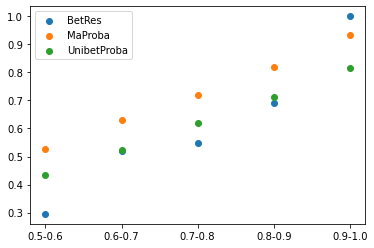

,BetRes,MaProba,UnibetProba
MaProbCat,,,
0.5-0.6,0.295455,0.527525,0.434448
0.6-0.7,0.520833,0.630903,0.524554
0.7-0.8,0.548387,0.720789,0.619309
0.8-0.9,0.689655,0.817433,0.710648
0.9-1.0,1.000000,0.932716,0.814548


In [117]:
GamesDay2 = r.merge(GamesDay, on=["Home", "Away", "DateD"], how='left')
GamesDay2['Result'] = GamesDay2.apply(lambda row: 'D' if row['HomeS'] == row['AwayS'] else 'H' if row['HomeS'] > row['AwayS'] else 'A', axis=1)
GamesDay2['HDA'] = GamesDay2.apply(lambda row: row['Result'] in row['Bet'], axis=1)

GamesDay2['threshold'] = GamesDay2['Bet'].str.split('&', n=1).str[1].str.replace(',', '.').str[1:].astype(float)
GamesDay2['r'] = GamesDay2['Bet'].str.split('&', n=1).str[1].str[:1].map({'M': '<', 'P': '>'})

GamesDay2 = pd.DataFrame(GamesDay2).assign(
    HomeS=pd.to_numeric(GamesDay2['HomeS'], errors='coerce'),
    AwayS=pd.to_numeric(GamesDay2['AwayS'], errors='coerce'),
    Goals=lambda x: x['HomeS'] + x['AwayS'],
    CompG=lambda x: np.where(
        x[['threshold', 'Goals', 'r']].isna().any(axis=1),
        True,
        np.where(
            x['r'] == '<',
            x['Goals'] < x['threshold'],
            np.where(
                x['r'] == '>',
                x['Goals'] > x['threshold'],
                None
            )
        )
    )
)

GamesDay2["BetRes"] = GamesDay2.apply(lambda row: row['CompG'] and row['HDA'], axis=1)
GamesDay3 = GamesDay2.drop(["Result", "HDA", "threshold", "r", "Goals", "CompG"], axis=1)

#Plot
bins = np.arange(0-0.001, 1.1-0.001, 0.1)
labels = [f"{x:.1f}-{x+0.1:.1f}" for x in bins[:-1]]
GamesDay3['MaProbCat'] = pd.cut(GamesDay3['MaProba'], bins=bins, labels=labels)
GamesDay3['UProbCat'] = pd.cut(GamesDay3['UnibetProba'], bins=bins, labels=labels)
grouped_data = GamesDay3.groupby('MaProbCat')[['BetRes', 'MaProba', 'UnibetProba']].mean()
fig, ax = plt.subplots()
ax.scatter(grouped_data.index, grouped_data['BetRes'], label='BetRes')
ax.scatter(grouped_data.index, grouped_data['MaProba'], label='MaProba')
ax.scatter(grouped_data.index, grouped_data['UnibetProba'], label='UnibetProba')
ax.legend()
plt.show()
grouped_data.dropna()
#GamesDay3[GamesDay3["MaProbCat"] == "0.8-0.9"]

In [124]:
GamesDay3[GamesDay3["MaProbCat"] == "0.9-1.0"]

,IdGame,Date,Home,Away,Bet,Odd,MaProba,UnibetProba,DiffProba,DateD,Week,HomeS,AwayS,BetRes,MaProbCat,UProbCat
30,2632192_1,2023-02-26 17:00:00,FC Salzburg,SV Ried,"H/D&M4,5",1.3755,0.944444,0.727008,1.299083,2023-02-26,2023W8,2,0,True,0.9-1.0,0.7-0.8
31,2634427_1,2023-02-26 15:00:00,AC Ajaccio,Troyes,H/A,1.3650,0.950000,0.732601,1.296750,2023-02-26,2023W8,2,1,True,0.9-1.0,0.7-0.8
63,2634223_1,2023-02-26 16:30:00,Servette,Winterthur,H/D,1.2495,0.950000,0.800320,1.187025,2023-02-26,2023W8,1,1,True,0.9-1.0,0.8-0.9
74,2634430_1,2023-02-26 20:45:00,Marseille,Paris SG,H/A,1.2915,0.900000,0.774293,1.162350,2023-02-26,2023W8,0,3,True,0.9-1.0,0.7-0.8
84,2648401_1,2023-02-26 18:30:00,Almeria,Barcelona,H/A,1.1970,0.950000,0.835422,1.137150,2023-02-26,2023W8,1,0,True,0.9-1.0,0.8-0.9
106,2673568_1,2023-02-26 16:45:00,PSV Eindhoven,FC Twente,H/D,1.2285,0.900000,0.814001,1.105650,2023-02-26,2023W8,3,1,True,0.9-1.0,0.8-0.9
149,2648415_1,2023-02-26 16:15:00,Levante,Lugo,"H/D&M4,5",1.1760,0.900000,0.850340,1.058400,2023-02-26,2023W8,3,1,True,0.9-1.0,0.8-0.9
151,2668703_1,2023-02-26 21:30:00,FC Porto,Gil Vicente,H/A,1.1130,0.950000,0.898473,1.057350,2023-02-26,2023W8,1,2,True,0.9-1.0,0.8-0.9
152,2648415_1,2023-02-26 16:15:00,Levante,Lugo,H/D,1.1130,0.950000,0.898473,1.057350,2023-02-26,2023W8,3,1,True,0.9-1.0,0.8-0.9
